In [80]:
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc 
from sklearn.neighbors import KNeighborsClassifier

In [81]:
def my_mode(data):
    counter = Counter(data)
    max_count = max(counter.values())
    modes = [value for value, count in counter.items() if count == max_count]
    return modes if len(modes) > 1 else modes[0]


In [82]:
def knn(X, y, Z, k, p=2):
    m = Z.shape[0]
    w = np.empty(m, dtype=y.dtype)

    for i in range(m):
        distances = np.linalg.norm(Z[i, :] - X, ord=p, axis=1)
        sorted_indices = np.argsort(distances)
        k_nearest_indices = sorted_indices[:k]

        k_nearest_labels = y[k_nearest_indices]
        mode_result = my_mode(k_nearest_labels)

        if type(mode_result) == list:
            selected_label = np.random.choice(mode_result)
        else:
            selected_label = mode_result

        w[i] = selected_label
    return w


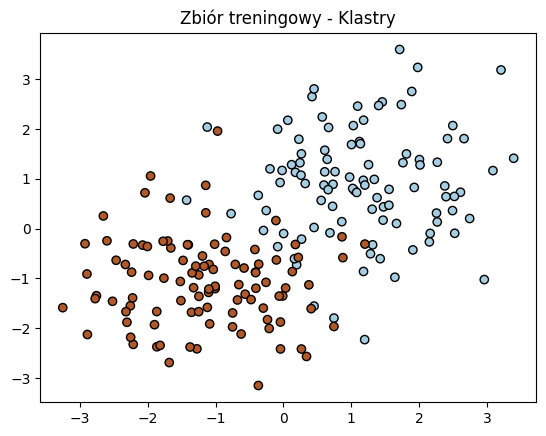

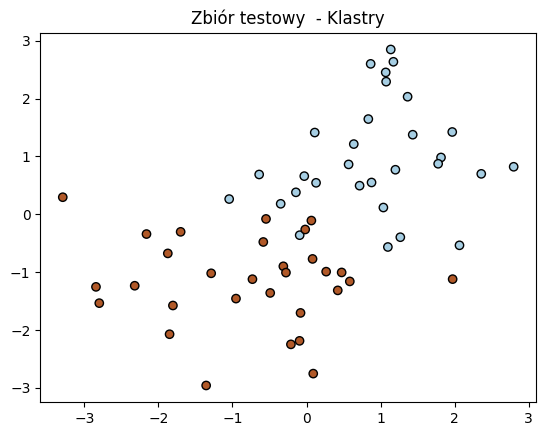

In [83]:
np.random.seed(123)
cluster1 = np.random.randn(100, 2) + np.array([1, 1])
cluster2 = np.random.randn(100, 2) + np.array([-1, -1])

X_train_clusters = np.vstack([cluster1, cluster2])
y_train_clusters = np.hstack([np.zeros(100), np.ones(100)])

np.random.seed(321)

cluster1_test = np.random.randn(30, 2) + np.array([1, 1])
cluster2_test = np.random.randn(30, 2) + np.array([-1, -1])

X_test_clusters = np.vstack([cluster1_test, cluster2_test])
y_test_clusters = np.hstack([np.zeros(30), np.ones(30)])


# Wyświetlmy zbiór treningowy
plt.scatter(X_train_clusters[:, 0], X_train_clusters[:, 1], c=y_train_clusters, cmap=plt.cm.Paired, edgecolor='k')
plt.title('Zbiór treningowy - Klastry')
plt.show()


# Wyświetlmy zbiór treningowy
plt.scatter(X_test_clusters[:, 0], X_test_clusters[:, 1],c=y_test_clusters, cmap=plt.cm.Paired, edgecolor='k')
plt.title('Zbiór testowy  - Klastry')
plt.show()

In [84]:
k = [3,5,7]
p = [1,2,3]
for i in k:
    for j in p:
        labels_ring = knn(X_train_clusters, y_train_clusters, X_test_clusters, i,j)
        accuracy_ring = accuracy_score(y_test_clusters, labels_ring)
        if j == 3:
            labels_ring = knn(X_train_clusters, y_train_clusters, X_test_clusters, i,np.inf)
            accuracy_ring = accuracy_score(y_test_clusters, labels_ring)
        
        print("Wynik dla p=" ,j,"i k=",i, "kalstry 1")
        print("Dokładność:", accuracy_ring)
        neigh = KNeighborsClassifier(n_neighbors=i,p =j)
        neigh.fit(X_train_clusters,y_train_clusters)

        y_pred = neigh.predict(X_test_clusters)

        accuracy = accuracy_score(y_test_clusters, y_pred)
        accuracy


labels_ring = knn(X_train_clusters, y_train_clusters, X_test_clusters,5 ,np.inf)
tn, fp, fn, tp = confusion_matrix(y_test_clusters, labels_ring).ravel()
(tn, fp, fn, tp)


for j in p:
    labels_ring = knn(X_train_clusters, y_train_clusters, X_train_clusters, 1,j)
    accuracy_ring = accuracy_score(y_train_clusters, labels_ring)
    print("Dokładność:", accuracy_ring)
    if j == 3:
        labels_ring = knn(X_train_clusters, y_train_clusters, X_train_clusters, 1,np.inf)
        accuracy_ring = accuracy_score(y_train_clusters, labels_ring)
        print("Dokładność:", accuracy_ring)

Wynik dla p= 1 i k= 3 kalstry 1
Dokładność: 0.8833333333333333
Wynik dla p= 2 i k= 3 kalstry 1
Dokładność: 0.8833333333333333
Wynik dla p= 3 i k= 3 kalstry 1
Dokładność: 0.9166666666666666
Wynik dla p= 1 i k= 5 kalstry 1
Dokładność: 0.9
Wynik dla p= 2 i k= 5 kalstry 1
Dokładność: 0.9166666666666666
Wynik dla p= 3 i k= 5 kalstry 1
Dokładność: 0.9333333333333333
Wynik dla p= 1 i k= 7 kalstry 1
Dokładność: 0.9333333333333333
Wynik dla p= 2 i k= 7 kalstry 1
Dokładność: 0.9166666666666666
Wynik dla p= 3 i k= 7 kalstry 1
Dokładność: 0.9333333333333333
Dokładność: 1.0
Dokładność: 1.0
Dokładność: 1.0
Dokładność: 1.0


In [87]:
neigh = KNeighborsClassifier(n_neighbors=7,p=np.inf)
neigh.fit(X_train_clusters,y_train_clusters)

y_pred = neigh.predict(X_test_clusters)

accuracy = accuracy_score(y_test_clusters, y_pred)
accuracy

0.9333333333333333

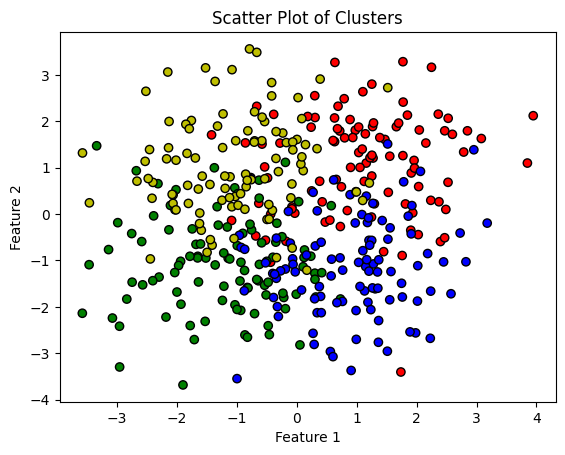

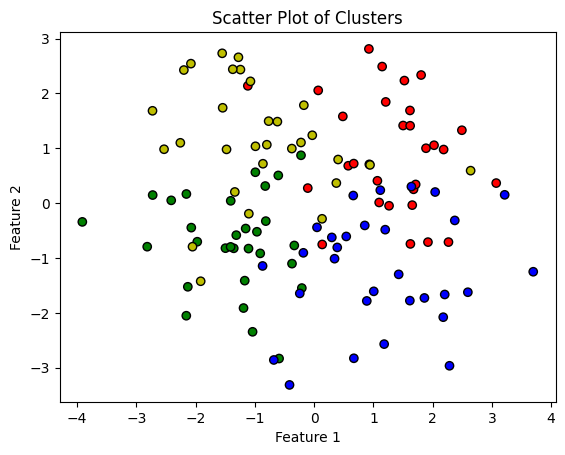

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3.])

In [65]:
np.random.seed(987)
cluster1 = np.random.randn(100, 2) + np.array([1, 1])
cluster2 = np.random.randn(100, 2) + np.array([-1, -1])
cluster3 = np.random.randn(100, 2) + np.array([1, -1])
cluster4 = np.random.randn(100, 2) + np.array([-1, 1])

X_train_clusters = np.vstack([cluster1, cluster2, cluster3,cluster4])
y_train_clusters = np.hstack([np.zeros(100),np.ones(100),np.full(100, 2),np.full(100, 3)])

np.random.seed(789)

cluster1_test = np.random.randn(30, 2) + np.array([1, 1])
cluster2_test = np.random.randn(30, 2) + np.array([-1, -1])
cluster3_test = np.random.randn(30, 2) + np.array([1, -1])
cluster4_test = np.random.randn(30, 2) + np.array([-1, 1])

X_test_clusters = np.vstack([cluster1_test, cluster2_test, cluster3_test,cluster4_test])
y_test_clusters = np.hstack([np.zeros(30),np.ones(30),np.full(30, 2),np.full(30, 3)])


colors = np.array(['r'] * 100 + ['g'] * 100 + ['b'] * 100 + ['y'] * 100)

# Narysowanie scatter plot
plt.scatter(X_train_clusters[:, 0], X_train_clusters[:, 1], c=colors, marker='o', edgecolors='k')

# Dodanie etykiet i tytułu
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Clusters')

# Wyświetlenie legendy


# Wyświetlenie wykresu
plt.show()

colors = np.array(['r'] * 30 + ['g'] * 30 + ['b'] * 30 + ['y'] * 30)

# Narysowanie scatter plot
plt.scatter(X_test_clusters[:, 0], X_test_clusters[:, 1], c=colors, marker='o', edgecolors='k')

# Dodanie etykiet i tytułu
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Clusters')

# Wyświetlenie wykresu
plt.show()

In [66]:
k = [3,5,7]
p = [1,2,3]
for i in k:
    for j in p:
        labels_ring = knn(X_train_clusters, y_train_clusters, X_test_clusters, i,j)
        accuracy_ring = accuracy_score(y_test_clusters, labels_ring)
        if j == 3:
            labels_ring = knn(X_train_clusters, y_train_clusters, X_test_clusters, i,np.inf)
            accuracy_ring = accuracy_score(y_test_clusters, labels_ring)
        
        print("Wynik dla p=" ,j,"i k=",i, "klastry 2")
        print("Dokładność:", accuracy_ring)

labels_ring = knn(X_train_clusters, y_train_clusters, X_test_clusters,3 ,2)
conf= confusion_matrix(y_test_clusters, labels_ring)
print(conf)

for j in p:
    labels_ring = knn(X_train_clusters, y_train_clusters, X_train_clusters, 1,j)
    accuracy_ring = accuracy_score(y_train_clusters, labels_ring)
    print("Dokładność:", accuracy_ring)
    if j == 3:
        labels_ring = knn(X_train_clusters, y_train_clusters, X_train_clusters, 1,np.inf)
        accuracy_ring = accuracy_score(y_train_clusters, labels_ring)
        print("Dokładność:", accuracy_ring)

Wynik dla p= 1 i k= 3 kalstry 2
Dokładność: 0.7083333333333334
Wynik dla p= 2 i k= 3 kalstry 2
Dokładność: 0.7166666666666667
Wynik dla p= 3 i k= 3 kalstry 2
Dokładność: 0.7
Wynik dla p= 1 i k= 5 kalstry 2
Dokładność: 0.6833333333333333
Wynik dla p= 2 i k= 5 kalstry 2
Dokładność: 0.7083333333333334
Wynik dla p= 3 i k= 5 kalstry 2
Dokładność: 0.7083333333333334
Wynik dla p= 1 i k= 7 kalstry 2
Dokładność: 0.6916666666666667
Wynik dla p= 2 i k= 7 kalstry 2
Dokładność: 0.6833333333333333
Wynik dla p= 3 i k= 7 kalstry 2
Dokładność: 0.6666666666666666
[[23  2  3  2]
 [ 0 22  1  7]
 [ 5  5 19  1]
 [ 4  3  1 22]]
Dokładność: 1.0
Dokładność: 1.0
Dokładność: 1.0
Dokładność: 1.0


In [88]:
neigh = KNeighborsClassifier(n_neighbors=3,p=2)
neigh.fit(X_train_clusters,y_train_clusters)

y_pred = neigh.predict(X_test_clusters)

accuracy = accuracy_score(y_test_clusters, y_pred)
accuracy

0.8833333333333333